Prior mean: 0.5


NameError: name 'Y' is not defined

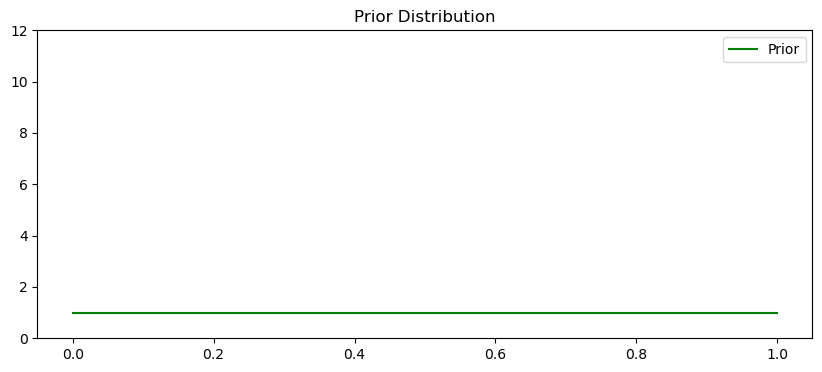

In [11]:
%matplotlib inline
import numpy as np
import pandas as pd
# import statsmodels.api as sm
import sympy as sp
# import pymc
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from scipy.special import gamma

from sympy.interactive import printing
printing.init_printing()



t, T, s = sp.symbols('theta, T, s')

# Create the function symbolically
likelihood = (t**s)*(1-t)**(T-s)

# Convert it to a Numpy-callable function
_likelihood = sp.lambdify((t,T,s), likelihood, modules='numpy')

# For alpha_1 = alpha_2 = 1, the Beta distribution
# degenerates to a uniform distribution
a1 = 1
a2 = 1

# Prior Mean
prior_mean = a1 / (a1 + a2)
print('Prior mean:', prior_mean)

# Plot the prior
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
X = np.linspace(0,1, 1000)
ax.plot(X, stats.beta(a1, a2).pdf(X), 'g');

# Cleanup
ax.set(title='Prior Distribution', ylim=(0,12))
ax.legend(['Prior']);

# Find the hyperparameters of the posterior
a1_hat = a1 + Y.sum()
a2_hat = a2 + nobs - Y.sum()

# Posterior Mean
post_mean = a1_hat / (a1_hat + a2_hat)
print('Posterior Mean (Analytic):', post_mean)

# Plot the analytic posterior
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
X = np.linspace(0,1, 1000)
ax.plot(X, stats.beta(a1_hat, a2_hat).pdf(X), 'r')

# Plot the prior
ax.plot(X, stats.beta(a1, a2).pdf(X), 'g')

# Cleanup
ax.set(title='Posterior Distribution (Analytic)', ylim=(0,12))
ax.legend(['Posterior (Analytic)', 'Prior'])